## Titanic EDA

In [1]:
#import libraries
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#read the data
#titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic = pd.read_csv("train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


This shows a total of 891 instances present in the training set, with 10 feature columns and 1 dependent column (Survived). 

In [7]:
#show data statistics for the numerical columns: Age, PassengerId, Survived, Pclass, SibSp, Parch, Fare
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above table shows, the min age corresponds to an infant passenger with age: 0.42 and max age is 80 years old passenger. Similarly, the min and max fare are 0 and 512 respectively. It also shows passengers were travelling with total Siblings/spouse count of max 8 and Parent-children count of 6.


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows null values in Age, Cabin and Emabarked

### Data Visualization

Lets look at some of the visualization using different features

**Age and Fare Distribution**

Plot the histogram to check for the distribution of Age and Far

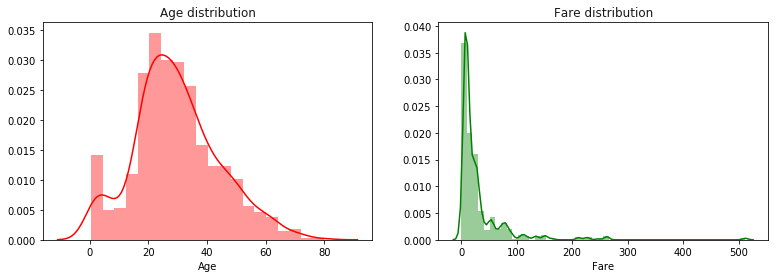

In [9]:
#distribution of Age
fig, axs = plt.subplots(ncols = 2)
age_ax = sns.distplot(titanic["Age"].dropna(), ax = axs[0], color = "red")
age_ax.set_title('Age distribution', fontsize = 12, color = "black", alpha = 0.9)
age_ax.set(xlabel = 'Age')
age_ax.figure.set_size_inches(10,4)

#distribution of Fare
fare_ax = sns.distplot(titanic["Fare"].dropna(), ax = axs[1], color = "green")
fare_ax.set_title('Fare distribution', fontsize = 12, color = "black", alpha = 0.9)
fare_ax.set(xlabel = 'Fare')
fare_ax.figure.set_size_inches(13,4)

While Age has more of a normla distribution, Fare is mostly right skewed with values mostly between 0-100

**Age distribution for survived/non survived**

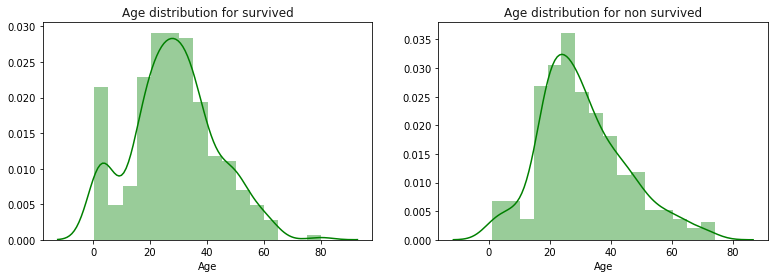

In [10]:
fig, axs = plt.subplots(ncols = 2)
#distribution of age distribution for survived
age_sur_ax = sns.distplot(titanic[titanic["Survived"] == 1]["Age"].dropna(), ax = axs[0], 
                           color = "green")
age_sur_ax.set_title('Age distribution for survived', fontsize = 12, color = "black", alpha = 0.9)
age_sur_ax.set(xlabel = 'Age')
age_sur_ax.figure.set_size_inches(13,4)

#distribution of age distribution for non survived
age_ns_ax = sns.distplot(titanic[titanic["Survived"] == 0]["Age"].dropna(), ax = axs[1], 
                             color = "green")
age_ns_ax.set_title('Age distribution for non survived', fontsize = 12, color = "black", alpha = 0.9)
age_ns_ax.set(xlabel = 'Age')
age_ns_ax.figure.set_size_inches(13,4)

The age distibution for survived and non-survived which looks like a normal distribution

**Age vs Survived for male and female**

[Text(0, 0, 'Yes'), Text(0, 0, 'No')]

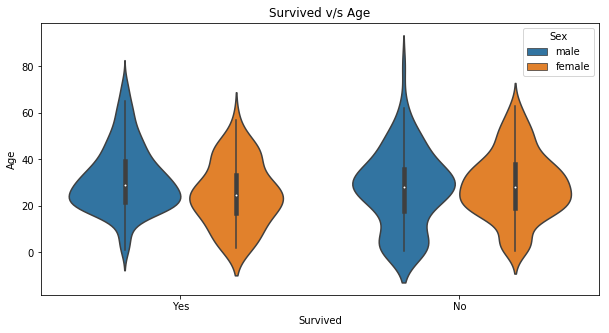

In [11]:
plt.figure(figsize=(10,5))
plt.title('Survived v/s Age')
sur_sex_ax = sns.violinplot(x = "Survived",y = "Age",data = titanic, hue = 'Sex')
sur_sex_ax.set_xticklabels(['Yes','No'])

**Age v/s survived based on Pclass**

This shows that more second class people did not survive compared to survived. However, the first class survived and third class seem to be almost same.

[Text(0, 0, 'Yes'), Text(0, 0, 'No')]

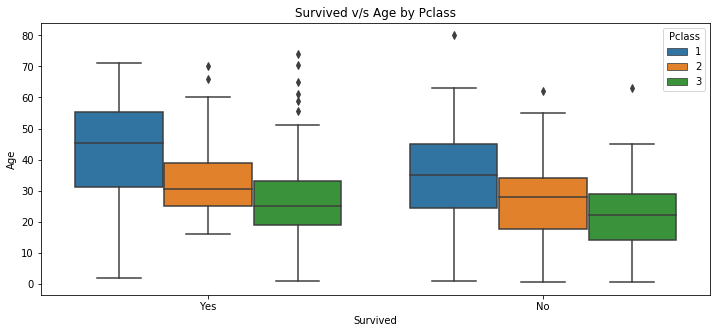

In [12]:
plt.figure(figsize=(12,5))
plt.title('Survived v/s Age by Pclass')
sur_class_ax = sns.boxplot(x = "Survived",y = "Age",data = titanic, hue = 'Pclass')
sur_class_ax.set_xticklabels(['Yes','No'])

**Survived**

In [13]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

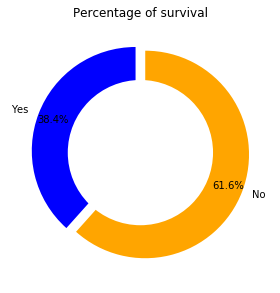

In [14]:
survived = len(titanic[titanic["Survived"] == 1])
not_survived = len(titanic[titanic["Survived"] == 0])
labels = ["Yes","No"]
values  = [survived, not_survived]

plt.pie(values, colors = ['blue','orange'], labels = labels, autopct = '%1.1f%%', startangle = 90, 
        pctdistance = 0.85, explode = (0.05,0.05))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Percentage of survival")
plt.show()

This shows a statistic of the count of survival: 342 and non-survival (549). Also a pie chart shows the percentage of survival: 38.4% which is almost 1.6 times less compared to not-survived. 

**Pclass and Embarked**

Plot to see what percentage of people are staying in 1st, 2nd and 3rd class and at what places did passengers embark.

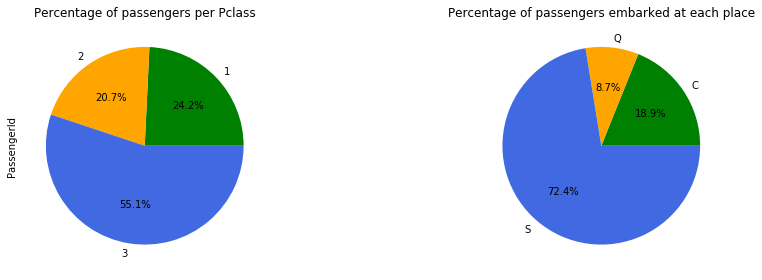

In [15]:
#plot the graph
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

pclass_stat = titanic.groupby(['Pclass'])["PassengerId"].count()

#plot the percentage of loan status
pclass_stat.plot(kind = "pie", subplots= True, colors = ["green","orange",'royalblue'],
                 autopct = '%1.1f%%', legend = False, ax = ax1)
plt.axis('off')
ax1.title.set_text("Percentage of passengers per Pclass")

embark_stat = titanic.groupby(['Embarked'])["PassengerId"].count()

#plot the percentage of loan status
embark_stat.plot(kind = "pie", subplots= True, colors = ["green","orange",'royalblue'],
                 autopct = '%1.1f%%', legend = False, ax = ax2)
plt.axis('off')
ax2.title.set_text("Percentage of passengers embarked at each place")

Majority of the passengers stay in 3rd class: lower class while majority of the passengers embarked at S: Southampton, the 1st port of embarkation for Titanic ship

Plot to show the count Survived-non-survived of passengers embarked at each place and in each class.

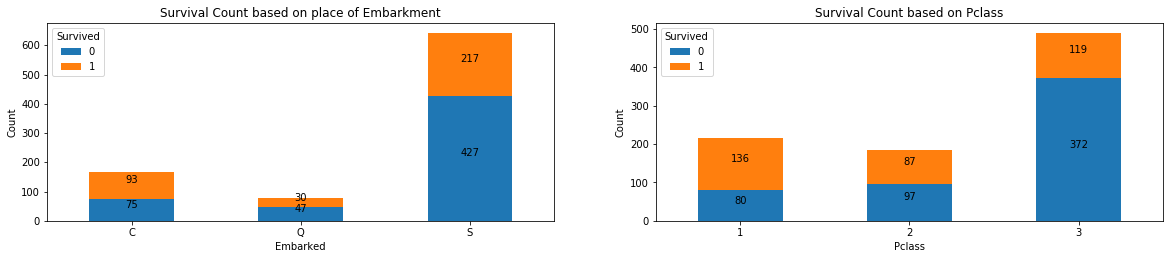

In [16]:
#groupby embarked and survived
embark_survived = titanic.groupby(['Embarked',"Survived"]).size()

#groupby pclass and survived
pclass_survived = titanic.groupby(['Pclass',"Survived"]).size()

#plot the graph
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

#embark
ax_embark = embark_survived.unstack().plot(kind = "bar",stacked = True, rot = 0, ax = ax1, 
                                         legend = True, figsize = (20,8))
ax1.title.set_text("Survival Count based on place of Embarkment")
ax1.set_xlabel('Embarked')
ax1.set_ylabel('Count')

#bar toppers
for p in ax_embark.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax_embark.text(x + width/2, 
                 y + height/2, 
                 '{:.0f}'.format(height), 
                 horizontalalignment = 'center',
                 verticalalignment = 'bottom')

#pclass
ax_pclass = pclass_survived.unstack().plot(kind = "bar",stacked = True, rot = 0, ax = ax2, 
                                            legend = True, figsize = (20,8))
ax2.title.set_text("Survival Count based on Pclass")
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Count')

#bar toppers
for p in ax_pclass.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax_pclass.text(x + width/2, 
                    y + height/2, 
                    '{:.0f}'.format(height), 
                    horizontalalignment = 'center',
                    verticalalignment = 'bottom')

plt.show()

Based on the graph, for embarkment, more passengers embarked at Southampton, Queenstown did not survive compared to Cherbourg. Similarly, for Pclass, more passengers in lower and middle class. This shows the place of embarkment and Pclass affects passengers who survived or not.

**Family Size**

The dataset consists of two columns: Parch-# of parents/children, SibSp-# of siblings/spouse. A feature called “Family Size” is extracted which is the sum of Parch+SibSp+1 for each passenger.

In [17]:
titanic["Family Size"] = titanic["SibSp"] + titanic["Parch"] + 1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


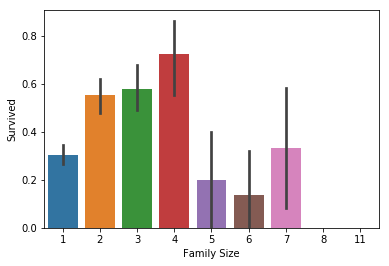

In [18]:
sns.barplot(x = "Family Size", y = "Survived", data = titanic)

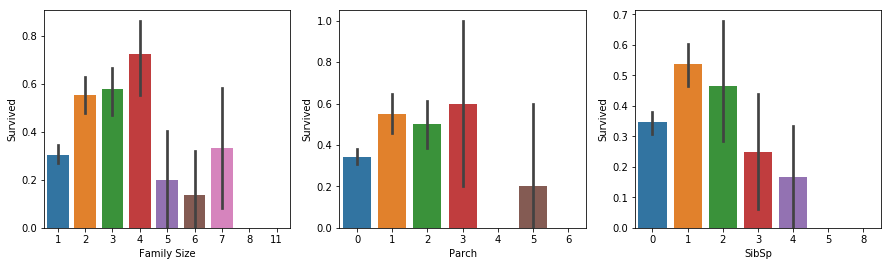

In [19]:
#plot the graph
fig, axs = plt.subplots(ncols = 3)

f = sns.barplot(x = "Family Size", y = "Survived", data = titanic, ax = axs[0])
f.figure.set_size_inches(15,4)
sns.barplot(x = "Parch", y = "Survived", data = titanic, ax = axs[1])
sns.barplot(x = "SibSp", y = "Survived", data = titanic, ax = axs[2])

The above bar plots for Family Size, SibSp, Parch shows the survival rate. Family Size with 4 have high survival rate of 0.8 while 6 has least at <0.2. Similarly, 3 Parch and 1 SibSp have survival of 0.6 and 0.55 respectively. This shows the larger the size of the family, lesser is the change of survival. 

**Title**

This feature is extracted from the “Name” column.

In [20]:
titanic["Title"] = list(map(lambda x: (re.search(r'[a-zA-Z]+\.',x).group()).capitalize(),titanic["Name"]
                            .values))
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss.


In [21]:
titanic["Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Mme.           1
Lady.          1
Jonkheer.      1
Don.           1
Countess.      1
Capt.          1
Sir.           1
Ms.            1
Name: Title, dtype: int64

Since there are many title values, we ll map them to common title as below.

In [22]:
titanic["Title"] = titanic["Title"].map({"Mr.":"Mr","Miss.":"Miss","Mrs.":"Mrs","Master.":"Master",
                                         "Dr.":"Officer","Rev.":"Officer","Major.":"Officer",
                                         "Col.":"Officer","Mlle.":"Miss","Mme.":"Miss",
                                         "Jonkheer.":"Royal","Capt.":"Officer","Sir.":"Royal",
                                         "Don.":"Royal","Ms.":"Miss","Lady.":"Royal",
                                         "Countess.":"Royal"})

titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss


In [23]:
titanic["Title"].value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

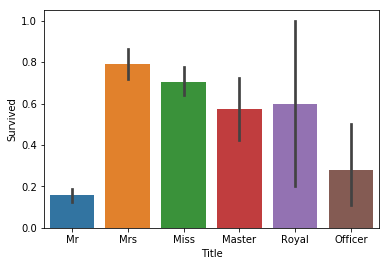

In [24]:
#plot to see survival rate for each title
sns.barplot(x = "Title", y = "Survived", data = titanic)

Above plot shows survival rate for each title. Title “Mrs, Miss” have highest rate of compared to others. This means, female passengers have high chance of survival compared to male. 

In [25]:
#prepare a pivot table to see the Fare for tile grouped by sex
purpose_loan_stat = np.round(pd.pivot_table(titanic, values=["Fare"], 
                                            index=['Title', 'Sex'],
                       aggfunc = {"Fare" : np.mean}),2)
purp_loan_stat = pd.DataFrame(data = purpose_loan_stat)
purp_loan_stat.T
#lambda x: x.value_counts().count()

Title Master   Miss     Mr    Mrs Officer         Royal       
Sex     male female   male female  female   male female   male
Fare    34.7  43.94  24.44  45.14   25.93  36.37  63.05  28.22

This shows the average Fare for each Title based on Sex. Here again female passengers (Miss, Mrs, Royal) seem to have more Fare compared to male. However, female officer has less than male officer. 